 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [32]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns


%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns
1. Read the Whale Portfolio daily returns from csv file
2. Identify and drop null values
3. Validate null values have been dropped

In [33]:
# Reading whale returns
whalepath = Path("./Resources/whale_returns.csv")
whalefile = pd.read_csv(whalepath, parse_dates=True, index_col = "Date", infer_datetime_format=True)
whaledf = pd.DataFrame(whalefile)
whaledf

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [34]:
# Count nulls
whaledf.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [35]:
# Drop nulls
whaledf.dropna(inplace=True)
whaledf.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns
1. Read the Algorithmic Daily returns from csv file
2. Identify and drop null values
3. Validate null values have been dropped

In [36]:
# Reading algorithmic returns
algopath = Path("./Resources/algo_returns.csv")
algofile = pd.read_csv(algopath, parse_dates=True, index_col = "Date", infer_datetime_format=True)
algodf = pd.DataFrame(algofile)

In [37]:
# Count nulls
algodf.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [38]:
# Drop nulls
algodf.dropna(inplace=True)
algodf.isna().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [39]:
# Reading S&P 500 Closing Prices
sppath = Path("./Resources/sp500_history.csv")
spfile = pd.read_csv(sppath, parse_dates=True, index_col = "Date", infer_datetime_format=True)
spdf = pd.DataFrame(spfile)

In [40]:
# Check Data Types
spdf.dtypes

Close    object
dtype: object

In [41]:
# Fix Data Types
# Use Str Replace to clear non-numeric char's from "Close"
spdf["Close"] = spdf["Close"].str.replace("$","")
spdf["Close"] = spdf["Close"].str.replace(",","")

#Type_cast "Close" value as a float and confirm change
spdf["Close"] = spdf["Close"].astype("float")
sp_clean = spdf
sp_clean

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


In [42]:
# Calculate Daily Returns
sp_clean = sp_clean.pct_change()


In [43]:
# Drop nulls
sp_clean = sp_clean.dropna()
sp_clean.isna().sum()

Close    0
dtype: int64

In [44]:
# Rename `Close` Column to be specific to this portfolio.
spfinal = sp_clean.rename(columns = {"Close":"S&P Returns"})
spfinal

,S&P Returns
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


## Combine Whale, Algorithmic, and S&P 500 Returns

In [45]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
joined_df = pd.concat([whaledf, algodf, spfinal], axis="columns", join="inner")
joined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

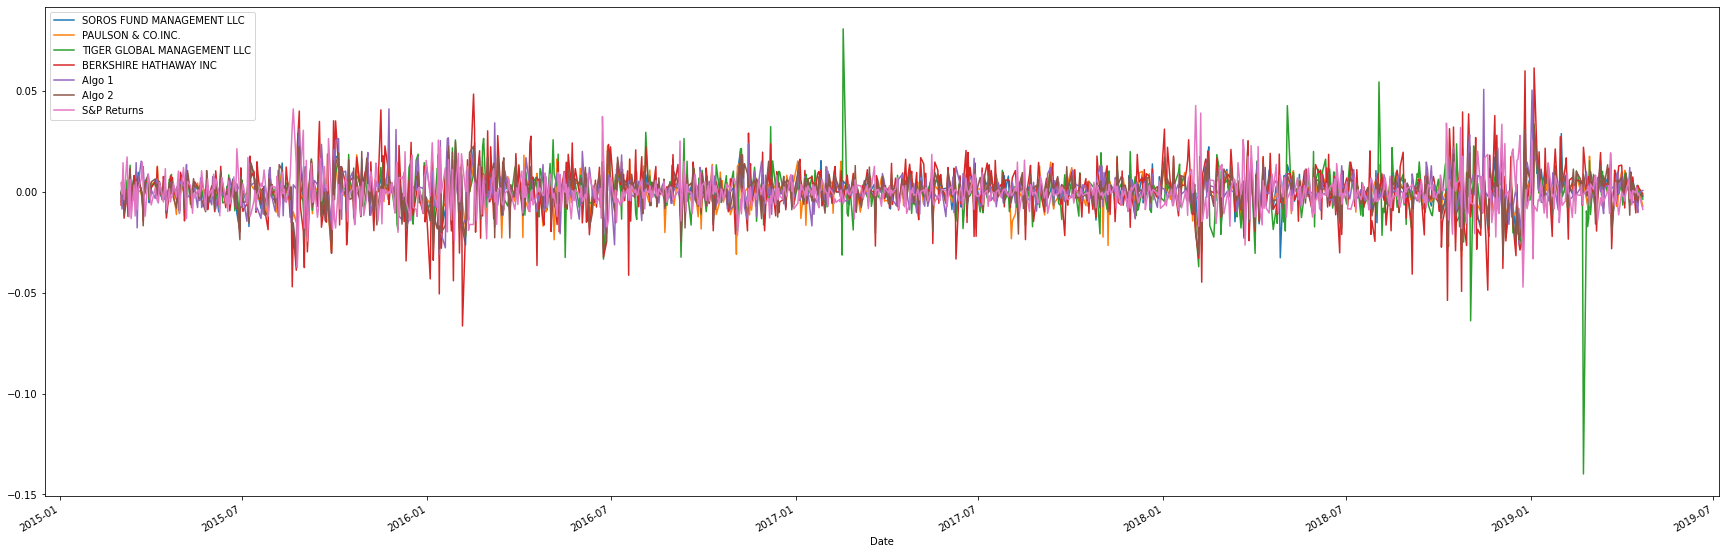

In [46]:
# Plot daily returns of all portfolios
joined_df.plot(figsize=(30,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

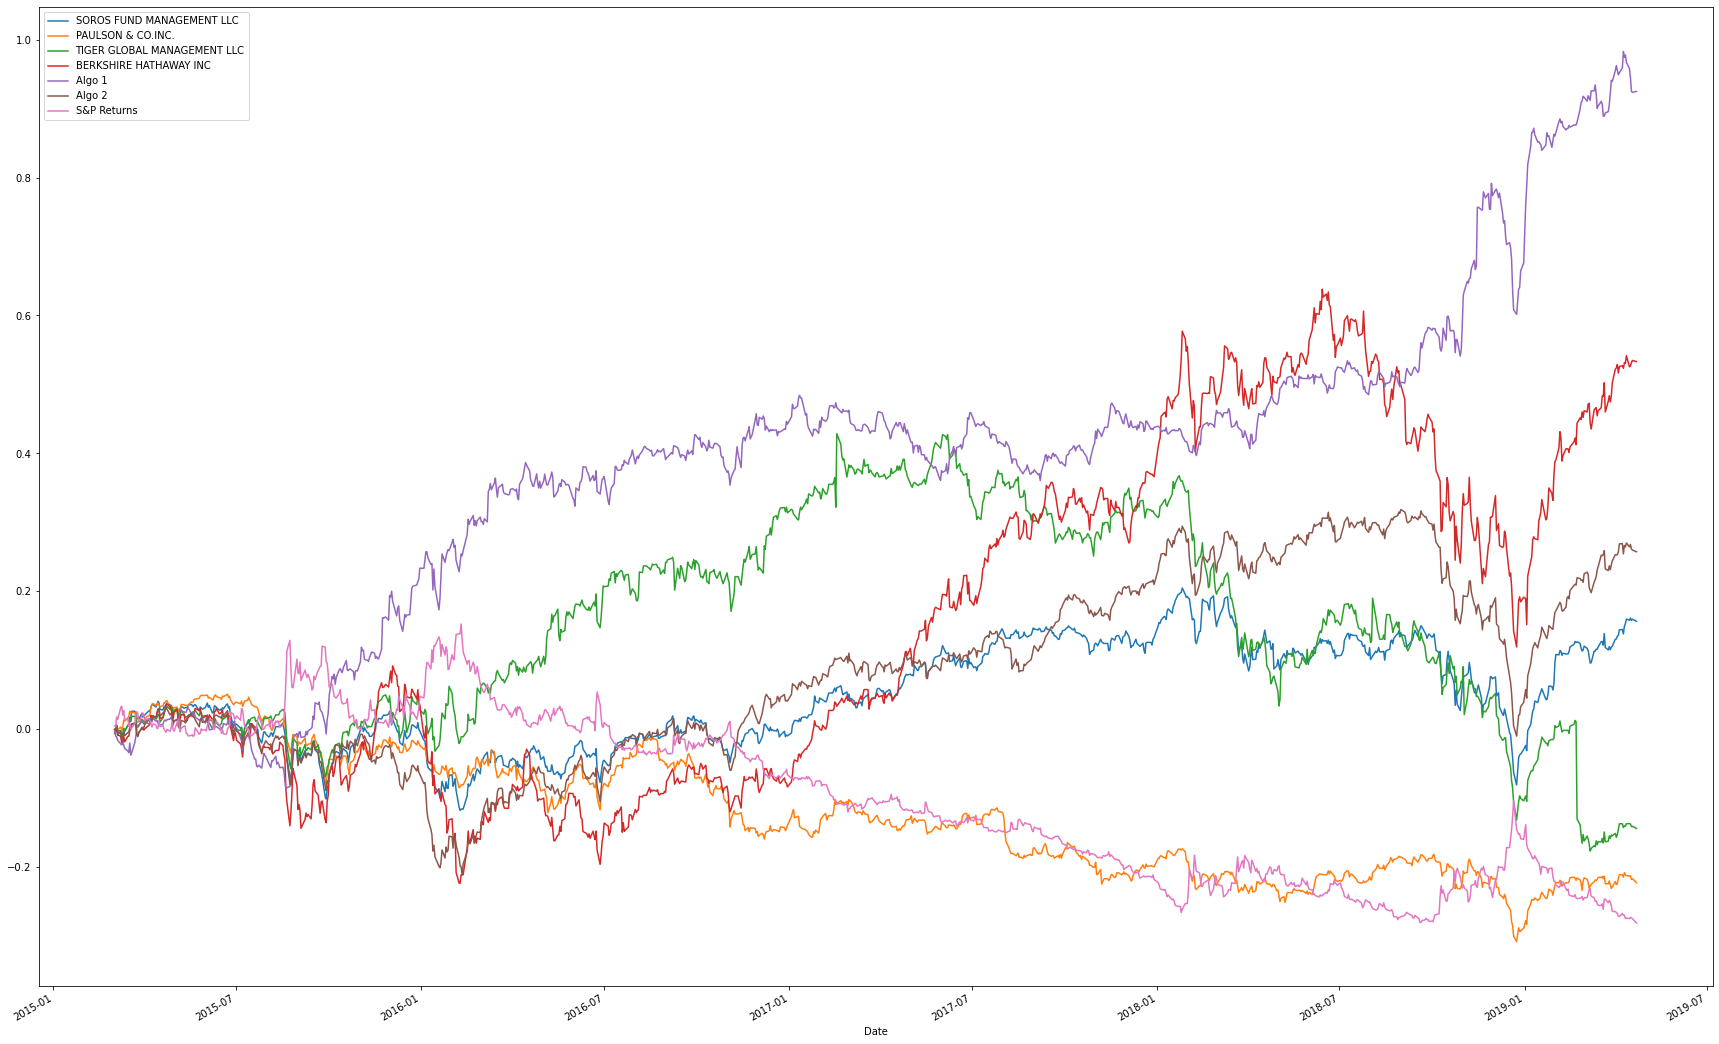

In [47]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + joined_df).cumprod() - 1

# Plot cumulative returns
cumulative_returns.plot(figsize=(30,20))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

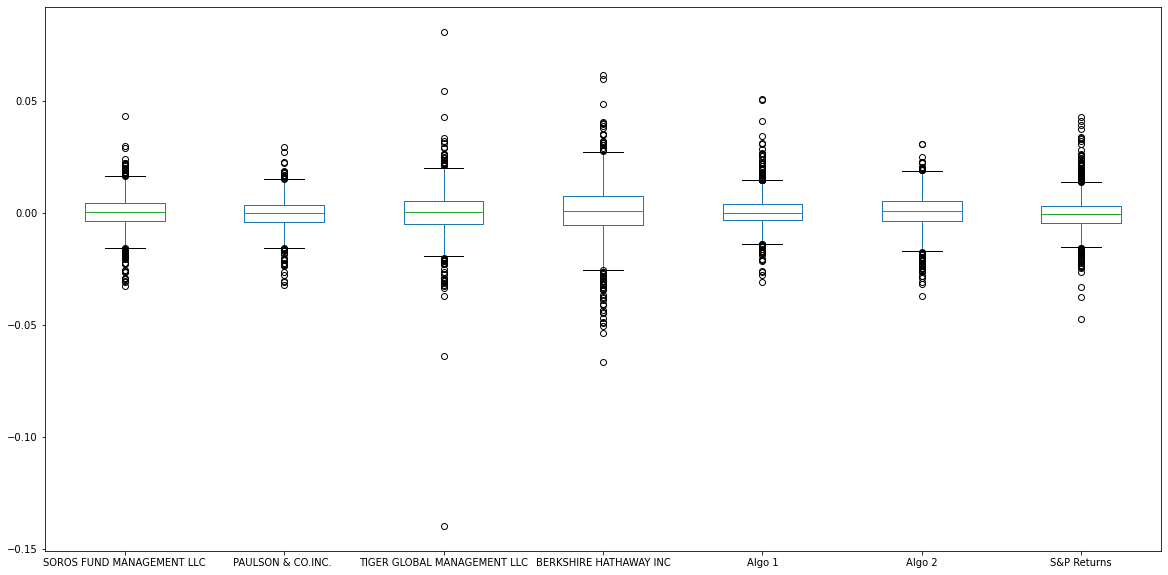

In [48]:
# Box plot to visually show risk
joined_df.plot.box(figsize=(20,10))

### Calculate Standard Deviations

In [49]:
# Calculate the daily standard deviations of all portfolios
whale_std = whaledf.std()
algo_std = algodf.std()
print(f"The whale portfolio standard deviaions are:\n{whale_std}\nThe algorithm standard deviations are:\n{algo_std}")

The whale portfolio standard deviaions are:
SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64
The algorithm standard deviations are:
Algo 1    0.007988
Algo 2    0.008466
dtype: float64


### Determine which portfolios are riskier than the S&P 500

In [50]:
# Calculate  the daily standard deviation of S&P 500
sp_dev = spfinal.std()
print(f"The standard deviaion for the S&P 500 is:\n{sp_dev}\n")
# Determine which portfolios are riskier than the S&P 500
std_compare = cumulative_returns.std().sort_values(ascending = False)
print(f"Portfolios that have a greater standard deviation than the S&P are riskier than investing directly into the index funds, see chart:\n{std_compare}")

The standard deviaion for the S&P 500 is:
S&P Returns    0.008135
dtype: float64

Portfolios that have a greater standard deviation than the S&P are riskier than investing directly into the index funds, see chart:
BERKSHIRE HATHAWAY INC         0.241382
Algo 1                         0.231772
TIGER GLOBAL MANAGEMENT LLC    0.149652
Algo 2                         0.131642
S&P Returns                    0.114846
PAULSON & CO.INC.              0.088447
SOROS FUND MANAGEMENT LLC      0.073187
dtype: float64


### Calculate the Annualized Standard Deviation

In [51]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
S&P Returns                    0.136313
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
Algo 1                         0.121006
PAULSON & CO.INC.              0.111527
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

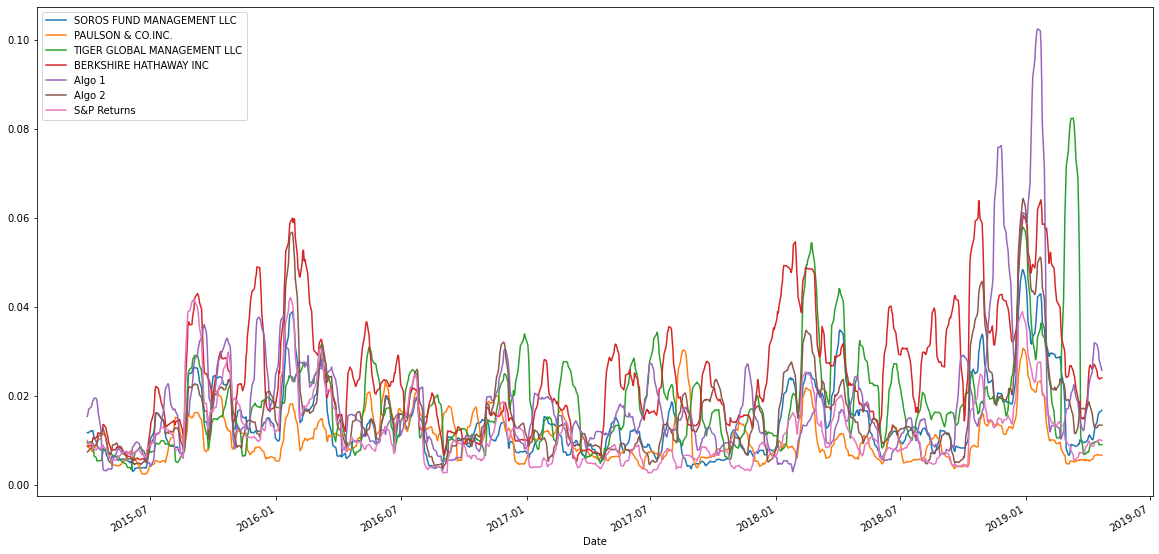

In [52]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_dev = cumulative_returns.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_dev.plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

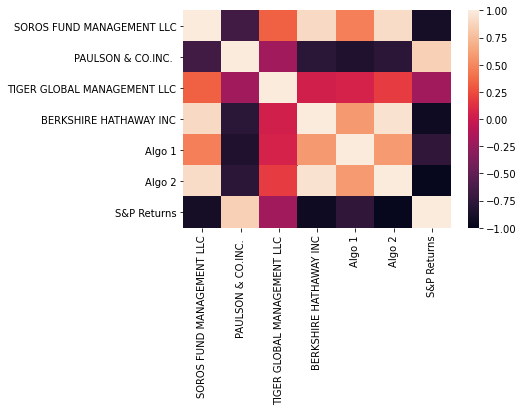

In [53]:
# Calculate the correlation
correlate = cumulative_returns.corr()
# Display the correlation matrix
sns.heatmap(correlate, vmin=-1,vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling Beta of Algorithm Portfolio 1'}, xlabel='Date'>

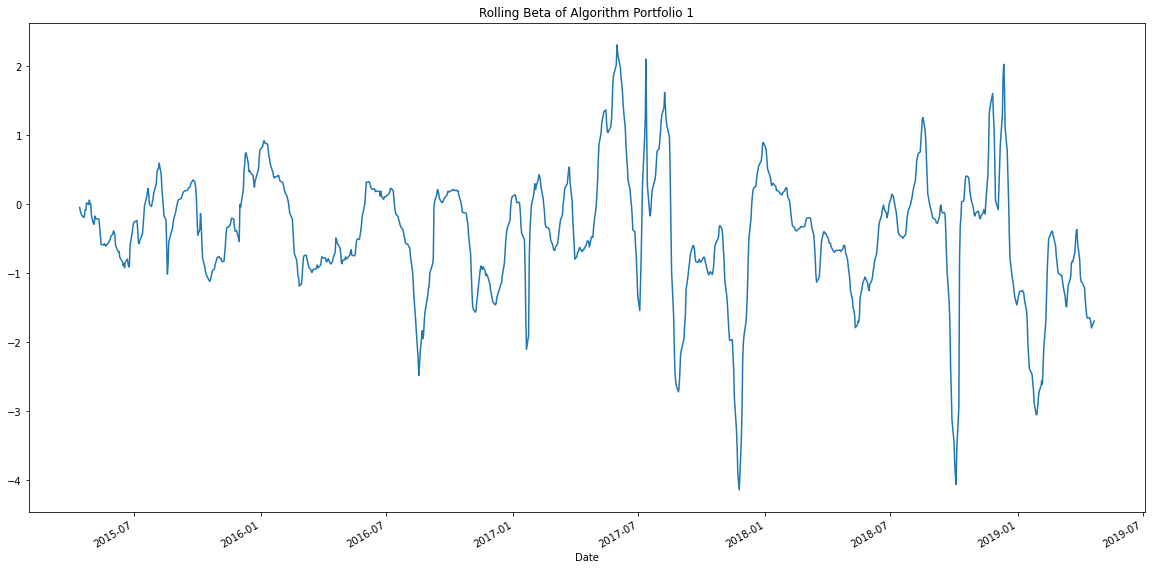

In [63]:
# Calculate covariance of a single portfolio
rolling_algo_covariance = cumulative_returns['Algo 1'].rolling(window=30).cov(cumulative_returns['S&P Returns'])
rolling_algo_covariance
# Calculate variance of S&P 500
rolling_variance = cumulative_returns['S&P Returns'].rolling(window=30).var()
variance
# Computing beta
rolling_algo_beta = rolling_algo_covariance / rolling_variance
rolling_algo_beta
# Plot beta trend
rolling_algo_beta.plot(figsize=(20,10), title="Rolling Beta of Algorithm Portfolio 1")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

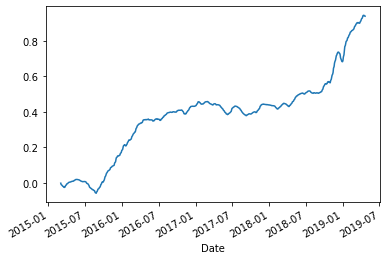

In [66]:
# Use `ewm` to calculate the rolling window
ewm = cumulative_returns["Algo 1"].ewm(span=21).mean()
ewm.plot()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [67]:
# Annualized Sharpe Ratios
sharpe_ratios = (
    cumulative_returns.mean() * 252 / (cumulative_returns.std() * np.sqrt(252))
)
sharpe_ratios

SOROS FUND MANAGEMENT LLC      10.784333
PAULSON & CO.INC.             -22.231926
TIGER GLOBAL MANAGEMENT LLC    15.724849
BERKSHIRE HATHAWAY INC         10.472499
Algo 1                         26.606482
Algo 2                         10.463945
S&P Returns                   -13.743079
dtype: float64

<AxesSubplot:>

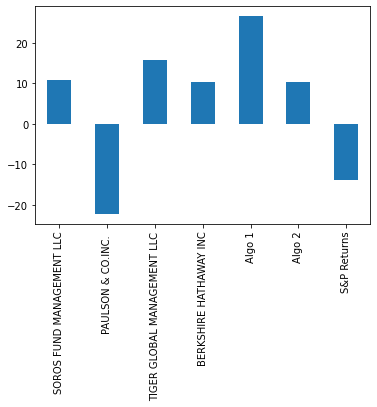

In [68]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Based on analysis, Algorithm 1 has outperformed both the whales portfolios and the S&P 55, but Algorithm 2 did not 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [75]:
# Reading data from 1st stock
googpath = Path("./Resources/goog_historical.csv")
googfile = pd.read_csv(googpath, parse_dates=True, index_col = "Trade DATE", infer_datetime_format=True)
googdf = pd.DataFrame(googfile)
googdf

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40
...,...,...
2018-05-17,GOOG,1078.59
2018-05-16,GOOG,1081.77
2018-05-15,GOOG,1079.23


In [80]:
# Reading data from 2nd stock
aaplpath = Path("./Resources/aapl_historical.csv")
aaplfile = pd.read_csv(aaplpath, parse_dates=True, index_col = "Trade DATE", infer_datetime_format=True)
aapledf = pd.DataFrame(aaplfile)
aapledf

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75
...,...,...
2018-05-17,AAPL,186.99
2018-05-16,AAPL,188.18
2018-05-15,AAPL,186.44


In [81]:
# Reading data from 3rd stock
costpath = Path("./Resources/cost_historical.csv")
costfile = pd.read_csv(costpath, parse_dates=True, index_col = "Trade DATE", infer_datetime_format=True)
costdf = pd.DataFrame(costfile)
costdf

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62
...,...,...
2018-05-17,COST,199.60
2018-05-16,COST,198.71
2018-05-15,COST,195.48


In [ ]:
# Combine all stocks in a single DataFrame


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualzied Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!